In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils

np.random.seed(10)

In [0]:
# 匯入CNN所需模組
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D   # 匯入keras的layer模組，後續卷積神經網路會使用

### 進行資料預處理

#### STEP1. 讀取mnist資料

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### STEP2. 將feature(數字影像特徵值)轉換為4維矩陣

In [0]:
X_Train4D = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_Test4D = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#### STEP3. 將feature(數字影像特徵值)標準化

In [0]:
X_Train4D_Normalize = X_Train4D / 255
X_Test4D_Normalize = X_Test4D / 255

#### STEP4. Label(數字真實值)進行OneHot encoding編碼

In [0]:
y_Train_OneHotEncoding = np_utils.to_categorical(y_train)
y_Test_OneHotEncoding = np_utils.to_categorical(y_test)

### 建立模型

#### STEP1. 建立keras的Sequential模型

In [0]:
model = Sequential()

#### STEP2. 建立卷積層1、池化層1、卷積層2與池化層2

* 建立卷積層1(影像數量不變，但縮減影像大小(藉由池化層1))

In [0]:
model.add(Conv2D(filters = 16,                 # 建立16個濾鏡filter weight
                 kernel_size = (5, 5),         # 每個濾鏡5*5大小
                 padding = 'same',             # 此設定表示卷積運算產生的卷積影響大小不變
                 input_shape = (28, 28, 1),    # 第1、2個維度代表輸入的影像形狀28*28大小，第3個維度表示單色灰階影響故維度為1
                 activation = 'relu'           # 設定ReLU激活函數
                )
         )

* 建立池化層1(縮減影像大小)

In [0]:
model.add(MaxPooling2D(pool_size = (2, 2)))   # 執行第一次縮減取樣，將16個28*28影像，經過pool_size(2, 2)縮減成16個14*14影像

* 建立卷積層2(改變影像數目)

In [0]:
model.add(Conv2D(filters = 36,             # 建立36個濾鏡filter weight
                 kernel_size = (5, 5),     # 每個濾鏡filter weight 5x5大小
                 padding = 'same',         # 此設定表示卷積運算產生的卷積影響大小不變
                 activation = 'relu'       # 設定ReLU激活函數
                )
         )

* 建立池化層2(進行第二次縮減影像)，並加入DropOut(0.25)避免Overfitting(每次迭代隨機放棄25%神經元)

In [0]:
model.add(MaxPooling2D(pool_size = (2, 2)))   # 將36個14*14影像，縮減成36個7*7影像

In [0]:
model.add(Dropout(0.25))

#### STEP3. 建立神經網路(平坦層、隱藏層、輸出層)

* 建立平坦層

In [0]:
model.add(Flatten())   # 前面已建立池化層2，共36個7x7影響，轉換為1維向量，共36*7*7=1764個數字，對應到1764個神經元，故不用輸入input

* 建立隱藏層

In [0]:
model.add(Dense(128, activation='relu'))   # 隱藏層共128個神經元

In [0]:
model.add(Dropout(0.5))

* 建立輸出層

In [0]:
model.add(Dense(10, activation='softmax'))   # 輸出層共10個神經元

#### STEP4. 查看模型摘要

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               225920    
__________

### 進行模型訓練

#### STEP1. 定義訓練方式

* 使用compile方法對訓練模型進行設定

In [0]:
model.compile(loss = 'categorical_crossentropy',   # 設定損失函數
              optimizer = 'adam',                  # 設定訓練的最優化方法，深度學習中使用adam最優化方法，可以讓訓練更快收斂，並提高準確率
              metrics = ['accuracy']               # 設定評估模型方式為accuracy準確率
             )

#### STEP2. 開始訓練

In [0]:
train_history = model.fit(x = X_Train4D_Normalize,     
                          y = y_Train_OneHotEncoding,
                          validation_split = 0.2,      # 將20%作為驗證資料
                          epochs = 10,                 # 訓練週期10次
                          batch_size = 300,            # 每次訓練使用300筆資料
                          verbose = 2                  # 顯示訓練過程
                         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 53s - loss: 0.4895 - acc: 0.8478 - val_loss: 0.0965 - val_acc: 0.9723
Epoch 2/10
 - 53s - loss: 0.1403 - acc: 0.9584 - val_loss: 0.0636 - val_acc: 0.9803
Epoch 3/10
 - 53s - loss: 0.1024 - acc: 0.9691 - val_loss: 0.0518 - val_acc: 0.9833
Epoch 4/10
 - 53s - loss: 0.0836 - acc: 0.9757 - val_loss: 0.0461 - val_acc: 0.9860
Epoch 5/10
 - 53s - loss: 0.0711 - acc: 0.9783 - val_loss: 0.0392 - val_acc: 0.9877
Epoch 6/10
 - 53s - loss: 0.0638 - acc: 0.9811 - val_loss: 0.0389 - val_acc: 0.9891
Epoch 7/10
 - 53s - loss: 0.0557 - acc: 0.9833 - val_loss: 0.0436 - val_acc: 0.9863
Epoch 8/10
 - 53s - loss: 0.0509 - acc: 0.9843 - val_loss: 0.0349 - val_acc: 0.9902
Epoch 9/10
 - 53s - loss: 0.0452 - acc: 0.9862 - val_loss: 0.0341 - val_acc: 0.9898
Epoch 10/10
 - 53s - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0335 - val_acc: 0.9903


#### STEP3. 畫出accuracy執行結果與loss誤差執行結果

* 先定義一個show_train_history視覺化曲線函式顯示訓練過程

In [0]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc = 'upper left')
  plt.show()

* accuracy執行結果曲線

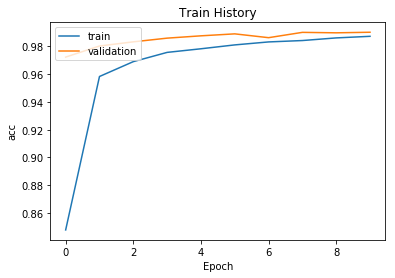

In [0]:
show_train_history(train_history, 'acc', 'val_acc')

* loss誤差執行結果

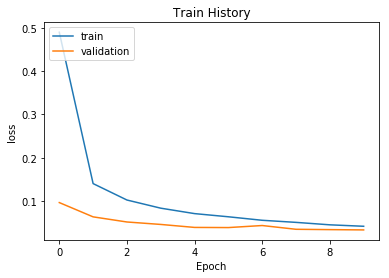

In [0]:
show_train_history(train_history, 'loss', 'val_loss')

#### STEP4. 評估模型準確率

In [0]:
scores = model.evaluate(X_Test4D_Normalize, y_Test_OneHotEncoding)
scores[1]

10000/10000 [==============================] - 4s 389us/step


0.9916

* 小結1：根據訓練結果顯示在訓練後期，訓練與驗證很接近，表示沒有出現Overfitting現象。
* 小結2：以測試資料評估準確率達99.16%

### 進行預測

#### STEP1. 進行預測

In [0]:
prediction = model.predict_classes(X_Test4D_Normalize)

#### STEP2. 預測結果

In [0]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

#### STEP3.顯示前10筆預測結果影像

* 先建立可以比較image影像與label值的函式plot_images_labels_prediction

In [0]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  
  if num>25:
    num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap='gray')
    title = 'label=' + str(labels[idx])
    if len(prediction)>0:
      title += ', predict='+ str(prediction[idx])
    
    ax.set_title(title, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
  
    idx += 1
  
  plt.show()

* 顯示前10筆預測結果

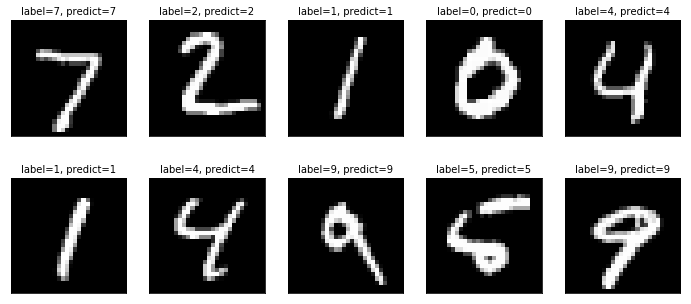

In [0]:
plot_images_labels_prediction(X_test, y_test, prediction, idx=0)

### 顯示混淆矩陣(Confusion matrix)

### STEP1. 使用pandas的crosstab建立混淆矩陣

In [0]:
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1133,1,0,0,1,0,0,0,0
2,2,1,1027,0,0,0,0,2,0,0
3,0,0,0,1002,0,3,0,3,2,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,4,0,884,2,1,0,0
6,5,2,0,0,2,1,948,0,0,0
7,0,2,3,1,0,0,0,1020,1,1
8,2,0,4,2,1,1,0,2,957,5


* 小結：比較MLP，CNN訓練的模型對於手寫數字辨識的能力更強，在真實值與預測值不同的項目中，有誤差的數量較少，模型能力也較強